## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Titanic dataset

In [3]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Explore the dataset


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##Question 1: What are the dimensions of the dataset?


In [18]:
num_rows, num_columns = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 891
Number of columns: 12


##Question 2: What are the column names?


In [19]:
column_names = df.columns.tolist()
print("Column names:", column_names)

Column names: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


##Question 3: Are there any missing values in the dataset?

In [20]:
missing_values_count = df.isnull().sum()
print("Missing values count per column:")
print(missing_values_count)

Missing values count per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


##Question 4: What are the data types of the columns?

In [21]:
column_data_types = df.dtypes
print("Data types of columns:")
print(column_data_types)

Data types of columns:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


##Question 5: What are the summary statistics of the dataset?


In [22]:
summary_statistics = df.describe()
print("Summary statistics of numerical columns:")
print(summary_statistics)

Summary statistics of numerical columns:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


##Question 6: What is the correlation between different columns?


In [23]:
correlation_matrix = df.corr()
print("Correlation matrix:")
print(correlation_matrix)

Correlation matrix:
             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


##Question 7: Are there any outliers in the dataset?


In [28]:
def find_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Example: Find outliers in the 'Age' column
outliers_age = find_outliers('Age')
print("Outliers in Age column:")
print(outliers_age)


Outliers in Age column:
     PassengerId  Survived  Pclass                                  Name  \
33            34         0       2                 Wheadon, Mr. Edward H   
54            55         0       1        Ostby, Mr. Engelhart Cornelius   
96            97         0       1             Goldschmidt, Mr. George B   
116          117         0       3                  Connors, Mr. Patrick   
280          281         0       3                      Duane, Mr. Frank   
456          457         0       1             Millet, Mr. Francis Davis   
493          494         0       1               Artagaveytia, Mr. Ramon   
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
672          673         0       2           Mitchell, Mr. Henry Michael   
745          746         0       1          Crosby, Capt. Edward Gifford   
851          852         0       3                   Svensson, Mr. Johan   

      Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embark

##Question 8: How is the data distributed in different columns?

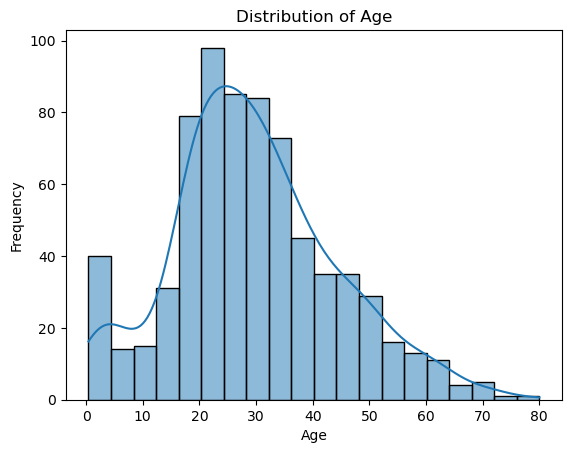

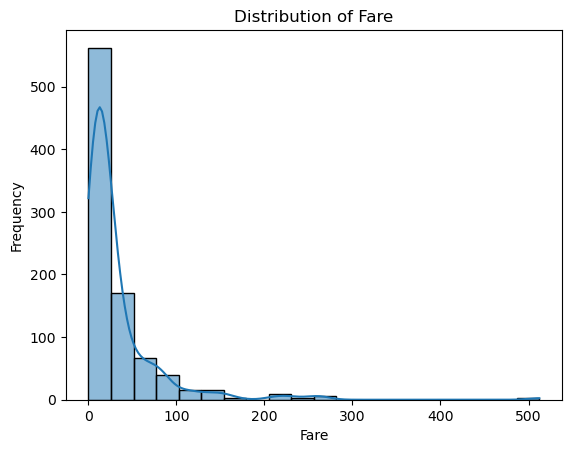

In [7]:
numerical_columns = ['Age', 'Fare'] 

for column in numerical_columns:
    sns.histplot(data=df, x=column, bins=20, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

##Question 9: Are there any categorical variables in the dataset?

In [32]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns:")
print(categorical_columns)

Categorical columns:
Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


##Question 10: What is the distribution of categorical variables?


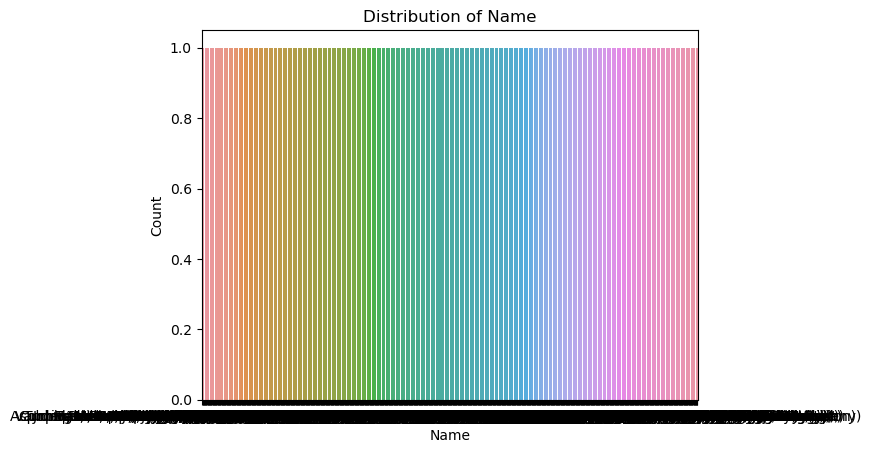

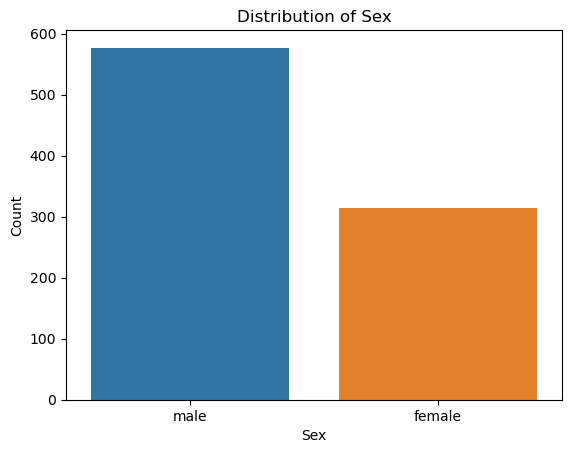

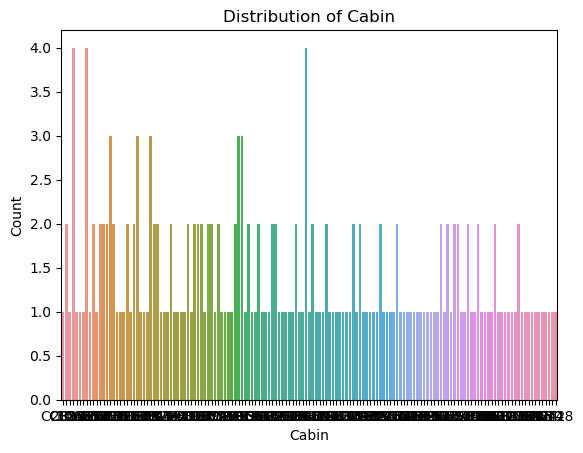

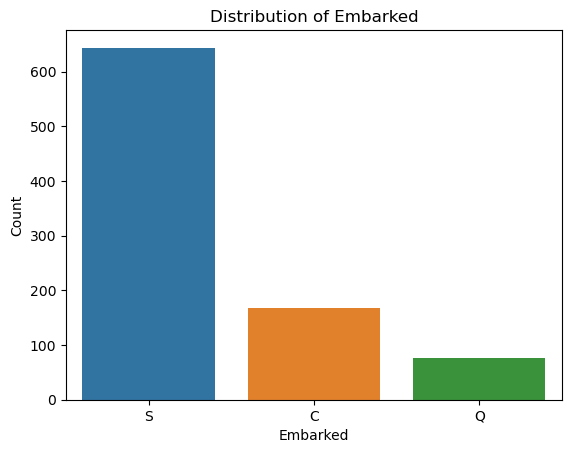

In [4]:
categorical_columns = ['Name','Sex', 'Cabin', 'Embarked']

for column in categorical_columns:
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

##Question 11: How many passengers survived (1) and died (0)?

In [36]:
survived_count = df['Survived'].value_counts()[1]
died_count = df['Survived'].value_counts()[0]

print("Number of passengers who survived:", survived_count)
print("Number of passengers who died:", died_count)

Number of passengers who survived: 342
Number of passengers who died: 549


##Question 12: What is the distribution of passenger classes (1st, 2nd, 3rd)?


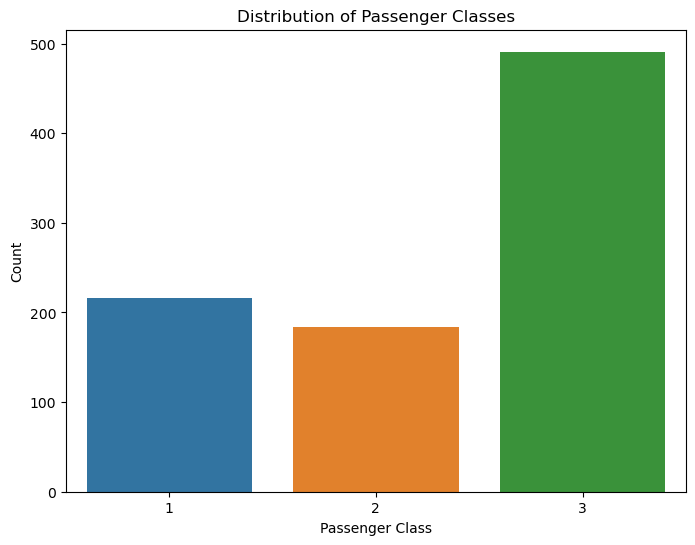

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Pclass')
plt.title('Distribution of Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

##Question 13: What is the distribution of passengers by gender?


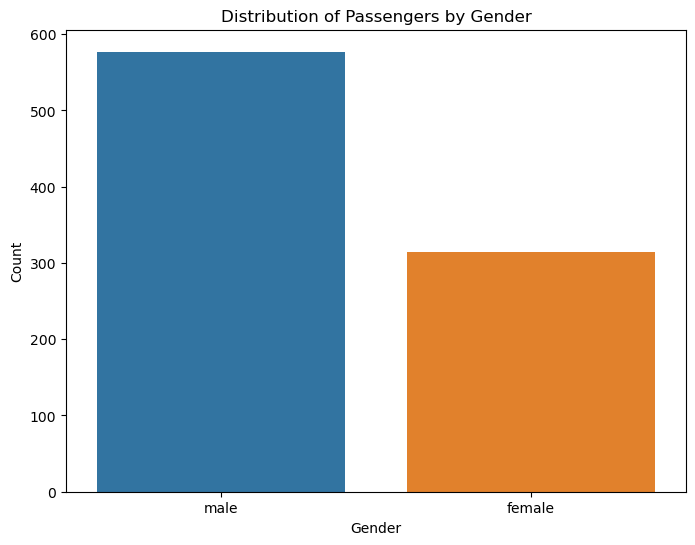

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(data= df, x='Sex')
plt.title('Distribution of Passengers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

##Question 14: What is the average age of passengers?


In [41]:
average_age = df['Age'].mean()
print("Average age of passengers:", average_age)

Average age of passengers: 29.69911764705882


##Question 15: What is the fare distribution for each passenger class?


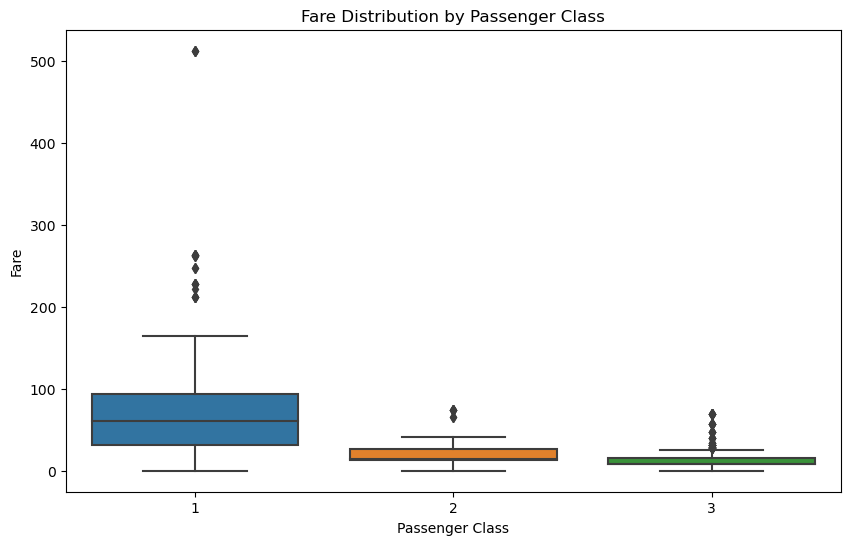

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Pclass', y='Fare')
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

##Question 16: What is the survival rate based on passenger class?


In [47]:
survival_rate_by_class = df.groupby('Pclass')['Survived'].mean()
print("Survival rate based on passenger class:")
print(survival_rate_by_class)

Survival rate based on passenger class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


##Question 17: What is the survival rate based on gender?


In [48]:
survival_rate_by_gender = df.groupby('Sex')['Survived'].mean()
print("Survival rate based on gender:")
print(survival_rate_by_gender)

Survival rate based on gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


##Question 18: What is the distribution of passengers by age and gender?

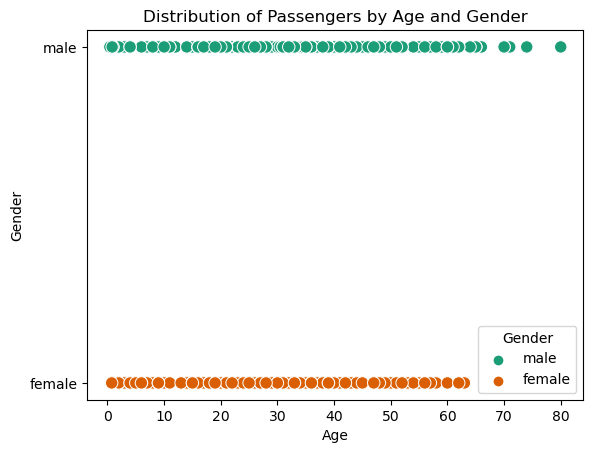

In [51]:
sns.scatterplot(x="Age", y="Sex", hue="Sex", data=df, palette="Dark2", s=80)
plt.title('Distribution of Passengers by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Gender')
plt.legend(title='Gender')
plt.show()

##Question 19: What is the distribution of passengers by embarkation port?


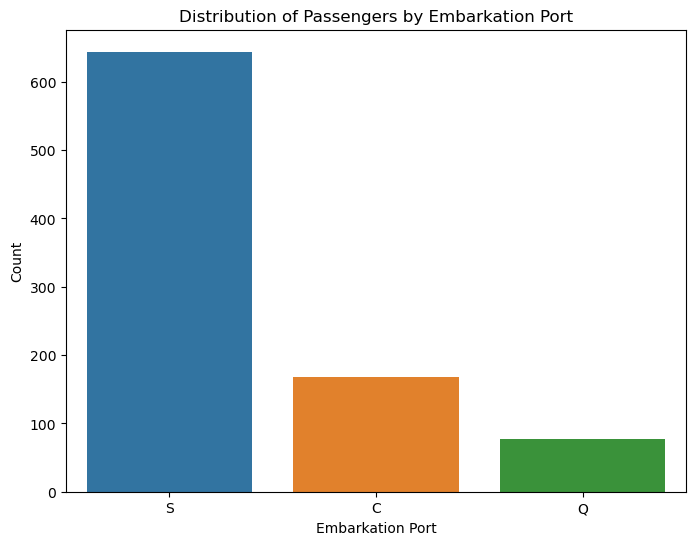

In [52]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Embarked')
plt.title('Distribution of Passengers by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Count')
plt.show()

##Question 20: What is the survival rate based on embarkation port?


In [53]:
survival_rate_by_embarkation = df.groupby('Embarked')['Survived'].mean()
print("Survival rate based on embarkation port:")
print(survival_rate_by_embarkation)

Survival rate based on embarkation port:
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


##Question 21: What is the survival rate based on the number of siblings/spouses aboard?


In [54]:
survival_rate_by_sibsp = df.groupby('SibSp')['Survived'].mean()
print("Survival rate based on the number of siblings/spouses aboard:")
print(survival_rate_by_sibsp)

Survival rate based on the number of siblings/spouses aboard:
SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


##Question 22: What is the survival rate based on the number of parents/children aboard?

In [56]:
survival_rate_by_parch = df.groupby('Parch')['Survived'].mean()
print("Survival rate based on the number of parents/children aboard:")
print(survival_rate_by_parch)

Survival rate based on the number of parents/children aboard:
Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


 ##Question 23: What is the survival rate based on the combination of siblings/spouses and parents/children aboard?


In [59]:
df['FamilySize'] = df['SibSp'] + df['Parch']
survival_rate_by_family_size = df.groupby('FamilySize')['Survived'].mean()
print("Survival rate based on family size:")
print(survival_rate_by_family_size)

Survival rate based on family size:
FamilySize
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64


##Question 24: What is the distribution of fare paid by passengers?

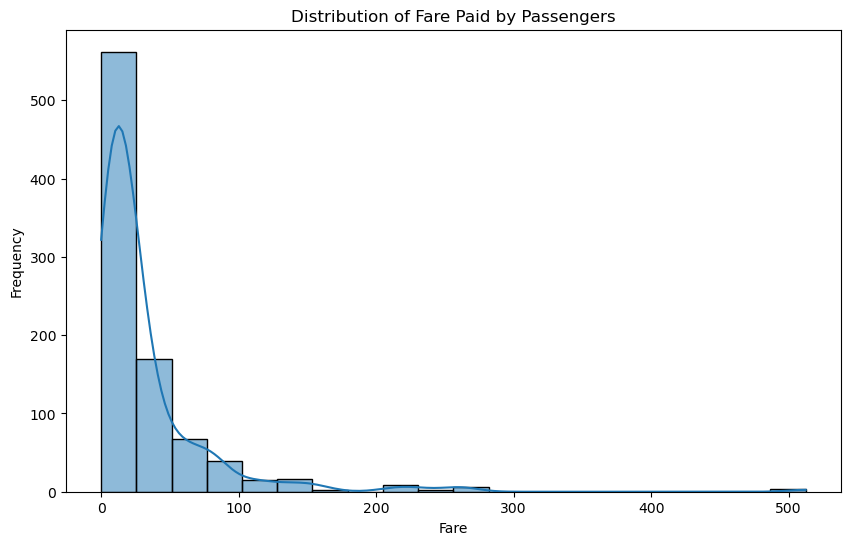

In [61]:
sns.histplot(data=df, x='Fare', bins=20, kde=True)
plt.title('Distribution of Fare Paid by Passengers')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

##Question 25: What is the average fare paid by passengers who survived and those who did not?


In [62]:
average_fare_by_survival = df.groupby('Survived')['Fare'].mean()
print("Average fare paid by passengers:")
print(average_fare_by_survival)

Average fare paid by passengers:
Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64


##Question 26: What is the survival rate based on the cabin class (if available)?

In [63]:
survival_rate_by_cabin = df.groupby('Cabin')['Survived'].mean()
print("Survival rate based on cabin class:")
print(survival_rate_by_cabin)

Survival rate based on cabin class:
Cabin
A10    0.0
A14    0.0
A16    1.0
A19    0.0
A20    1.0
      ... 
F33    1.0
F38    0.0
F4     1.0
G6     0.5
T      0.0
Name: Survived, Length: 147, dtype: float64


##Question 27: What is the survival rate based on whether the passenger had a cabin or not?

In [67]:
survival_rate_by_had_cabin = df.groupby(df['Cabin'].notnull())['Survived'].mean()

print("Survival rate based on whether the passenger had a cabin or not:")
print(survival_rate_by_had_cabin)

Survival rate based on whether the passenger had a cabin or not:
Cabin
False    0.299854
True     0.666667
Name: Survived, dtype: float64


##Filling missing values

In [85]:
df_cleaned = df.dropna()

# Fill missing values in numerical columns with mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Fill missing values in categorical columns with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Create a new column indicating missing values in 'Cabin'
df['Cabin(Updated)'] = df['Cabin'].isnull().astype(int)


In [90]:
df.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            0
FamilySize          0
Cabin(Updated)      0
dtype: int64

In [ ]:
# Once we have performed the data cleaning tasks, we can save the cleaned dataset to a new file named "train(updated).csv".


df.to_csv("train_updated.csv", index=False)